In [1]:
import pathlib
import numpy as np
import _pickle as pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import yaml
mpl.rcParams["font.size"]=14
#
import torch

from models.stnp import STNP
from activeLearner.active_learner import ActiveLearner
#

In [2]:
info_files= pathlib.Path("./logs/active_logs/").glob("*.yaml")

In [3]:
dlist=[]
for file in info_files:
    with open(file, "r") as fp:
        dlist.append(yaml.load(fp, Loader=yaml.SafeLoader))
        

In [4]:
train_loss=sorted([(d["train_size"]*100/(d["data_size"]), d["last_train_epoch_loss"]) for d in dlist])
val_loss=sorted([(d["train_size"]*100/(d["data_size"]), d["last_val_epoch_mse"]) for d in dlist])

train_wmape=sorted([(d["train_size"]*100/(d["data_size"]), d["last_train_epoch_wmape"]) for d in dlist])
val_wmape=sorted([(d["train_size"]*100/(d["data_size"]), d["last_val_epoch_wmape"]) for d in dlist])

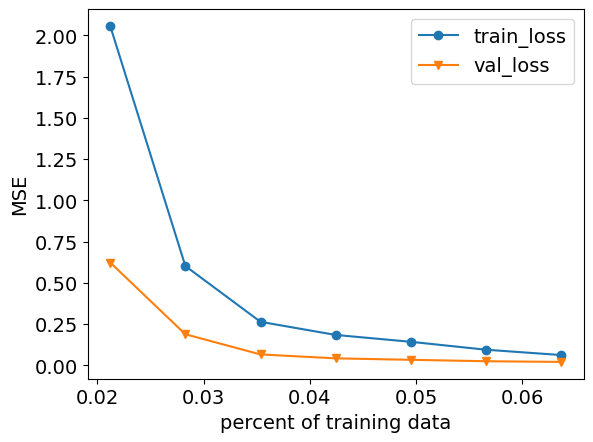

In [5]:


plt.plot(*zip(*train_loss), marker="o", linestyle="-", label="train_loss")
plt.plot(*zip(*val_loss), marker="v", linestyle="-", label="val_loss")

plt.gca().set(xlabel="percent of training data", ylabel='MSE')
# plt.ylim(ymax=2, ymin=0)
plt.legend()
#plt.savefig("figs/active.jpg", dpi=300, bbox_inches="tight")

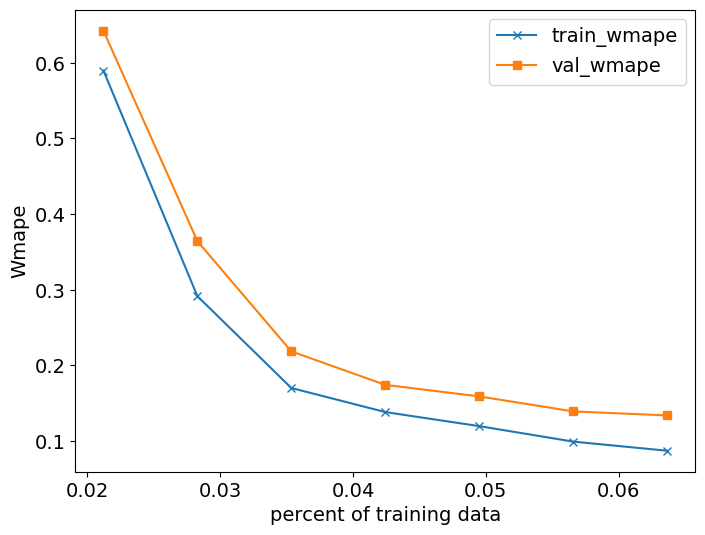

In [6]:
plt.figure(figsize=(8,6))
plt.plot(*zip(*train_wmape), marker="x", linestyle="-", label="train_wmape")
plt.plot(*zip(*val_wmape), marker="s", linestyle="-", label="val_wmape")
plt.gca().set(xlabel="percent of training data", ylabel='Wmape')
plt.legend()